In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [9]:
import os
import collections
import itertools

In [10]:
from six.moves import urllib

In [11]:
URL_TRAIN = "http://download.tensorflow.org/data/iris_training.csv"
URL_TEST = "http://download.tensorflow.org/data/iris_test.csv"

In [12]:
DOWNLOAD_TRAIN = "iris_training.csv"
DOWNLOAD_TEST = "iris_test.csv"

In [17]:
def download_data():
    if not os.path.exists(DOWNLOAD_TRAIN):
        filename, _ = urllib.request.urlretrieve(URL_TRAIN,DOWNLOAD_TRAIN)
    if not os.path.exists(DOWNLOAD_TEST):
        filename, _ = urllib.request.urlretrieve(URL_TEST,DOWNLOAD_TEST)
    print("TRAIN CSV")
    print("Found and downloaded file from {}".format(URL_TRAIN))
    print("Downloaded Filename: {}".format(DOWNLOAD_TRAIN))
    print("TEST CSV")
    print("Found and downloaded file from {}".format(URL_TEST))
    print("Downloaded Filename: {}".format(DOWNLOAD_TEST))

In [18]:
download_data()

TRAIN CSV
Found and downloaded file from http://download.tensorflow.org/data/iris_training.csv
Downloaded Filename: iris_training.csv
TEST CSV
Found and downloaded file from http://download.tensorflow.org/data/iris_test.csv
Downloaded Filename: iris_test.csv


In [95]:
df = pd.read_csv("Iris.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [97]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [98]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [100]:
df = df.iloc[:,1:]

In [101]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Vizualizing

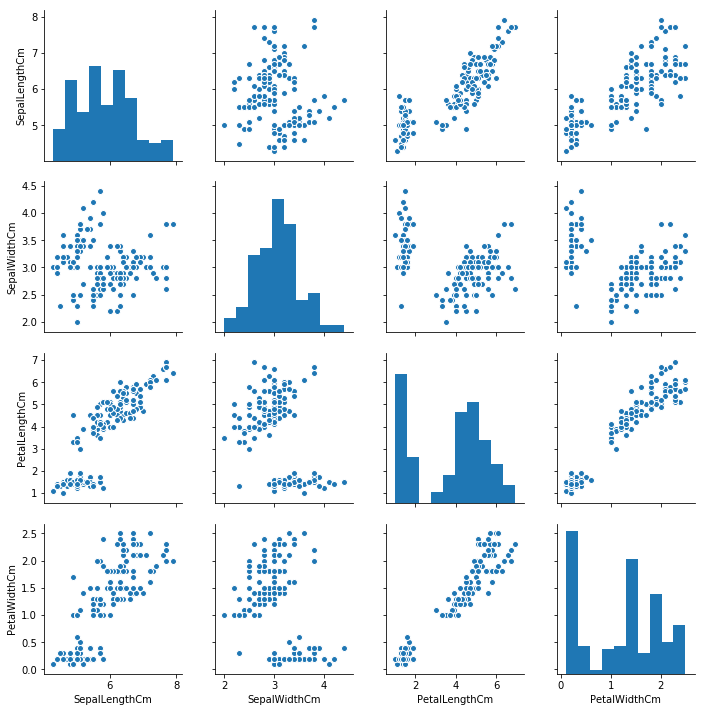

In [102]:
sns.pairplot(df)

### Handling categorical features

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [104]:
labelencoder_df = LabelEncoder()

In [214]:
df.iloc[:,4] = labelencoder_df.fit_transform(df.iloc[:,4])

In [215]:
X = df.iloc[:,:-1]

In [216]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [217]:
y = df.iloc[:,-1]

### Making the model

In [124]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

In [256]:
sess = tf_reset()


X_ph = tf.placeholder(dtype=tf.float32,shape=[None,4])
y_ph = tf.placeholder(dtype=tf.float32,shape=[None])

W0 = tf.get_variable(name='W0',shape=[4,30],initializer=tf.contrib.layers.xavier_initializer())
W1 = tf.get_variable(name='W1',shape=[30,1],initializer=tf.contrib.layers.xavier_initializer())

b0 = tf.get_variable(name='b0',shape=[30],initializer=tf.constant_initializer(0.))
b1 = tf.get_variable(name='b1',shape=[1],initializer=tf.constant_initializer(0.))

weights = [W0,W1]
bias = [b0,b1]
activations = [tf.nn.tanh,None]

layer = X_ph

for W, b, activation in zip(weights, bias, activations):
    layer = tf.matmul(layer,W) + b
    if activation is not None:
        layer = activation(layer)
output_pred = layer

In [257]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ph,logits=output_pred))

In [258]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

In [259]:
train = optimizer.minimize(loss)

In [260]:
sess.run(tf.global_variables_initializer())

In [261]:
saver = tf.train.Saver()

In [262]:
for training_steps in range(10000):
    sess.run(train,feed_dict={X_ph:X,y_ph:y})

In [263]:
cross_entropy = sess.run(loss,feed_dict={X_ph:X,y_ph:y})

In [264]:
cross_entropy

751.59467

In [228]:
output_pred_run = sess.run(output_pred, feed_dict={input_ph: X})

In [229]:
output_pred_run

array([[1740301. ],
       [1631517.6],
       [1615991.4],
       [1615990.9],
       [1740307.1],
       [1926741.6],
       [1662602.4],
       [1724761.6],
       [1538295.8],
       [1647075.2],
       [1833532.2],
       [1709228.5],
       [1600458.1],
       [1476161.8],
       [1895686.1],
       [2019982.9],
       [1864586.1],
       [1755824.4],
       [1942283.8],
       [1817990. ],
       [1817983.2],
       [1817971.4],
       [1616007.8],
       [1802403.8],
       [1755845.2],
       [1678131.5],
       [1771347.6],
       [1771375.8],
       [1740294.6],
       [1662608. ],
       [1662601.9],
       [1817952.6],
       [1849105.5],
       [1911240.5],
       [1647075.2],
       [1647060.6],
       [1786905.9],
       [1647075.2],
       [1538299. ],
       [1740297.6],
       [1724749.5],
       [1460562.9],
       [1569383.5],
       [1817936.9],
       [1895669.2],
       [1631505.4],
       [1818005.4],
       [1615994.4],
       [1817996.4],
       [1693680.5],
